In [17]:
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# apple inc data
ticker_symbol = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch historical data
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


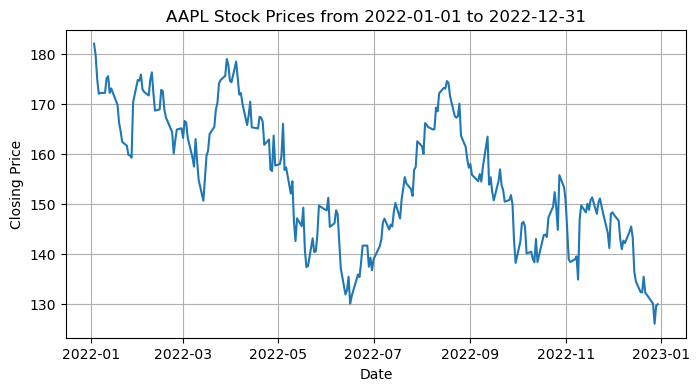

In [18]:
# visualizing data over the time
plt.figure(figsize=(8, 4))
plt.title(f"{ticker_symbol} Stock Prices from {start_date} to {end_date}")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.plot(stock_data['Close'])
plt.grid(True)
plt.show()

In [20]:
# data preprocessing
data = stock_data[['Close', 'Volume']]  # Select relevant columns
print(data.head())

# missing values
data.fillna(method='bfill', inplace=True)

# Normalization with Min-Max scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

                 Close     Volume
Date                             
2022-01-03  182.009995  104487900
2022-01-04  179.699997   99310400
2022-01-05  174.919998   94537600
2022-01-06  172.000000   96904000
2022-01-07  172.169998   86709100


C:\Users\Hp\AppData\Local\Temp\ipykernel_9372\1601260409.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(method='bfill', inplace=True)


In [21]:
# Transforming time series data into a sequence-to-sequence format
sequence_length = 10
prediction_horizon = 1 

X, y = [], []

for i in range(len(data) - sequence_length - prediction_horizon + 1):
    X.append(data[i:i + sequence_length])
    y.append(data[i + sequence_length + prediction_horizon - 1])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from tensorflow.keras.layers import LSTM, Dense

# Creating RNN model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(2))  # Predict both stock price and volume

# Compiling model
model.compile(optimizer='adam', loss='mean_squared_error')

# training model
model.fit(X_train, y_train, epochs=50, batch_size=32)
y_pred = model.predict(X_test)

Epoch 1/50
6/6 [==============================] - 2s 6ms/step - loss: 0.2054
Epoch 2/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0909
Epoch 3/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0347
Epoch 4/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0353
Epoch 5/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0297
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0241
Epoch 7/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0235
Epoch 8/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0214
Epoch 9/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0199
Epoch 10/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0185
Epoch 11/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0181
Epoch 12/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0174
Epoch 13/50
6/6 [==============================] - 0s 5ms/step - loss: 0.

In [24]:
# Finding accuracy on test data using MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.01229388847240765


In [25]:
# Save the model to a file
model.save("my_model.h5")